# RETRIEVING DOCUMENTS

### READING .TXT FILE

In [1]:
# First file is txt file which is saved on my desktop will be using os library to reach dir
import os 
path = "Novels/"


for file in os.listdir(path):
    if file.endswith(".txt"):
        documentName = file.split(".txt")[0]
        file_path = path + file
        # reading the data
        with open(file_path, 'r') as f:
            #save the content 
            document_1 = f.read()

In [2]:
#Show the content of Martial_Peak
document_1[:250]

'Martial Peak\n\n\nWǔ Liàn Diān Fēng • 武炼巅峰\n\n\n\n\n\nThe journey to the martial peak is a lonely, solitary and long one. In the face of adversity, you must survive and remain unyielding. Only then can you break through and continue on your journey to become '

### READING HTML 

In [3]:
import requests
from bs4 import BeautifulSoup
import pprint

#Accessing the HTML content from webpage
#There are 100 chapters , 
document_2 =""
for i in range(0,100):
    htm_url ="https://www.wuxiaworld.com/novel/martial-world/mw-chapter-"+ str(i)
    r = requests.get(htm_url)
    soup = BeautifulSoup(r.content, 'html5lib')
    #contents saved under div tag <div id ="chapter-outer"> ...
    table = soup.find("div", attrs= {"id":"chapter-content"})
    
    try:
        all_paragraphs = table.find_all("p")
        for p in all_paragraphs:
            document_2 += p.text
    except:
        pass
        

In [4]:
#Show the content of second document
document_2[:250]

'Chapter 0 – Magic Cube………In the vast and limitless expanse of mist and snow, endless ice shards swirled in the wind and collided in a violent maelstrom. Subzero temperatures chilled one’s bones to a freezing cold temperature, as if it would turn even'

In [5]:
def cleanText(rawtext):
    import re
    # lower / upper case
    text = rawtext.lower()
    
    #removing uni characters
    text_encode = text.encode("ascii", "ignore")
    text = text_encode.decode()

    # \t\n\
    text = re.sub(r'[\t|\n]+','',text)
    #removing 0903hello any word mixof 
    text = re.sub(r'[0-9]+[A-Za-z]+','',text)
    text = re.sub(r'[A-Za-z]+[0-9]+','',text)
    
    #punctuations
    text = re.sub(r"[^\w\s]+","",text)
    return text
    
    
def removeStopWords(text, unwanted):
    import nltk
    from nltk.corpus import stopwords
    
    stop_words = stopwords.words("english")
    stop_words.extend(unwanted)
    
    return " ".join([word for word in nltk.word_tokenize(text) if word not in stop_words])
    
def stemText(text):
    import nltk
    from nltk.stem import PorterStemmer
    stemmer = PorterStemmer()
    
    return " ".join(stemmer.stem(word) for word in nltk.word_tokenize(text))



def word_pos_tagger(word):
    import nltk
    from nltk.corpus import wordnet
    tag = nltk.pos_tag([word])[0][1][0]
    
    
    wordnet_map = {
        "N": wordnet.NOUN,
        "V": wordnet.VERB,
        "J": wordnet.ADJ,
        "R": wordnet.ADV
        }
    return wordnet_map.get(tag, wordnet.NOUN)


def lemmaText(text):
    
    import nltk 
    from nltk.stem import WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()
   
    return " ".join([lemmatizer.lemmatize(word, word_pos_tagger(word)) for word in nltk.word_tokenize(text)])

In [6]:
clean_document_1 = cleanText(document_1)
clean_document_2 = cleanText(document_2)

In [7]:
#Downloaded json file, which includes extra stopwords

import json
with open("Novels/stop_words_english.json") as f:
    unwanted = json.load(f)
    
print(unwanted[0:10])

['able', 'about', 'above', 'abroad', 'according', 'accordingly', 'across', 'actually', 'adj', 'after']


In [8]:
clean_document_1_wihtou_stopwords = removeStopWords(clean_document_1,unwanted=unwanted)
clean_document_2_wihtou_stopwords = removeStopWords(clean_document_2,unwanted=unwanted)

In [9]:
clean_document_1_wihtou_stopwords[:250]

'martial peakw lin din fng journey martial peak lonely solitary long face adversity survive remain unyielding break continue journey strongest high heaven pavilion tests disciples harshest ways prepare journey day lowly sweeper kai yang managed black '

In [10]:
clean_document_2_wihtou_stopwords[:250]

'chapter 0 magic cubein vast limitless expanse mist snow endless ice shards swirled wind collided violent maelstrom subzero temperatures chilled bones freezing cold temperature turn soul icehere snowfall realm myriad dimensions realm gods bleak hopele'

In [11]:
lemma_document_1 = lemmaText(clean_document_1_wihtou_stopwords)
lemma_document_2 = lemmaText(clean_document_2_wihtou_stopwords)

In [12]:
lemma_document_1[:1000]

'martial peakw lin din fng journey martial peak lonely solitary long face adversity survive remain unyielding break continue journey strong high heaven pavilion test disciple harshest way prepare journey day lowly sweeper kai yang manage black book set road peak martial worldauthorsmomo artistsyear chinagenresaction harem martial art mature xuanhuantagsaccelerated growth adapt manhua alchemy arrogant character cultivation cunning protagonist demon determine protagonist dragon fast cultivation genius protagonist god hardworking protagonist hidden ability immortal inheritance legendary artifact lucky protagonist male protagonist multiple realm noble old love interest personality phoenix pill concoct polygamy rape romantic subplot ruthless protagonist sexual cultivation technique shameless protagonist spatial manipulation strengthbased social hierarchy underestimated protagonist weak strongsource import asianovel version 3 version 2 309dd auhpriodate create 201905 english info chapter htt

In [13]:
#Collections 

In [14]:
frequency_1 = {}

for word in lemma_document_1.split():
    
    if word in frequency_1.keys():
        frequency_1[word] += 1
    else:
        frequency_1[word] =1
        
# sorting the frequency by values

frequency_1 ={word : value for word, value in sorted(frequency_1.items(), key=lambda items: items[1], reverse=True)}

In [15]:
count = 0

for word, value in frequency_1.items():
    
    print(word," : ", value)
    
    if count == 5:
        break
    count +=1

yang  :  5847
kai  :  5016
su  :  1118
time  :  974
disciple  :  973
qi  :  942


In [16]:
frequency_2 = {}

for word in lemma_document_2.split():
    
    if word in frequency_2.keys():
        frequency_2[word] += 1
    else:
        frequency_2[word] =1
        
# sorting the frequency by values

frequency_2 ={word : value for word, value in sorted(frequency_2.items(), key=lambda items: items[1], reverse=True)}

In [17]:
count = 0

for word, value in frequency_2.items():
    
    print(word," : ", value)
    
    if count == 5:
        break
    count +=1

ming  :  2679
lin  :  2531
martial  :  1266
body  :  603
time  :  587
true  :  568


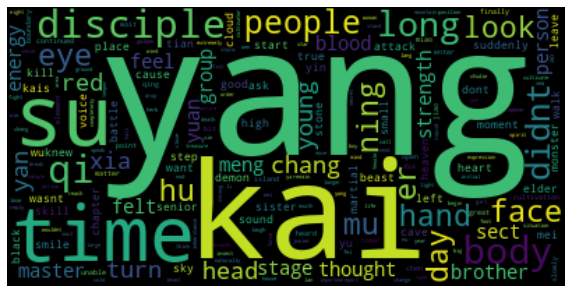

In [18]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
word_cloud = WordCloud().generate_from_frequencies(frequency_1)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

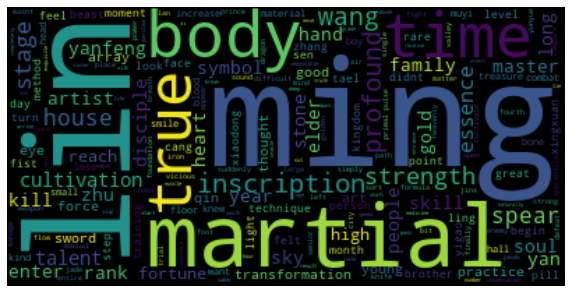

In [19]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


plt.figure(figsize=(10,8))
word_cloud = WordCloud().generate_from_frequencies(frequency_2)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [20]:
import pandas as pd

pd.to_pickle(lemma_document_1,"document_1.pickle")
pd.to_pickle(lemma_document_2,"document_2.pickle")